In [1]:
import torch
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import numpy as np

# Change path.
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

from src.experiment import Experiment
from src.utils import cross_entropy_for_onehot

### Set params

In [10]:
params = {
    "num_epochs": 1000,
    "data": "CIFAR",
    "index": 1,
    "batch_size": 1,
    "n_repeats": 1,
    "init_type": "gaussian_shift2",
    "measure": "gaussian",
    "Q": 1,
    "val_size": 20,
    "lr": 0.001,
#     "sigma": 1000,
    "nn": "ResNet"
}

Approx Sigma size for LeNet: 0.0063207196071743965

Approx Sigma size for ResNet: 0.001787270070053637

### Run experiment

In [11]:
torch.manual_seed(42)
random.seed(42)
exp = Experiment(params, rand_ims=True)

Running on cpu
Files already downloaded and verified
torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 64, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 128, 1, 1])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([2

In [ ]:
exp.train()

0 1.5780583620
20 1.3552001715
40 1.1876229048
60 1.0647089481
80 0.9720633030
100 0.8993516564
120 0.8402523994
140 0.7910521626
160 0.7494374514
180 0.7138422728
200 0.6831448674
220 0.6565076113
240 0.6332793236
260 0.6129336953
280 0.5950372219
300 0.5792277455
320 0.5652016997
340 0.5527073145
360 0.5415340662
380 0.5315052271
400 0.5224722028
420 0.5143057108
440 0.5068962574
460 0.5001456738


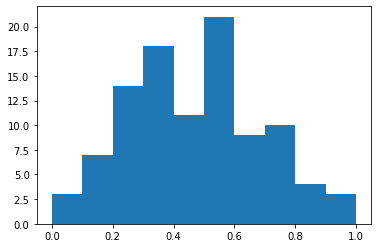

In [8]:
dummy_data, dummy_label = exp.init_data()

# with torch.no_grad():
#     dist = (dummy_label.amax(dim=(1), keepdim=True) - dummy_label.amin(dim=(1), keepdim=True))
#     dist[dist==0.] = 1.
#     scale = 1.0 /  dist
#     dummy_label.mul_(scale).sub_(dummy_label.amin(dim=(1), keepdim=True))

plt.hist(dummy_label[0].detach().numpy().reshape(-1))
plt.show()

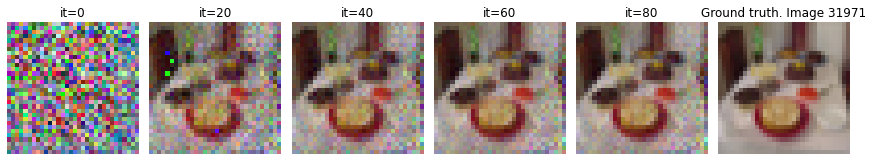

In [17]:
exp.make_reconstruction_plots()

In [9]:
losses = exp.losses
losses['mse']

[[0.07170316399101774,
  0.0716002699179853,
  0.07170452226778906,
  0.07189379530321281,
  0.0719784344784221,
  0.07196444817597165,
  0.07194088013201035,
  0.07196834536070106,
  0.07206931354345018,
  0.07224715232325946,
  0.0724965854173434,
  0.07280848250657355,
  0.07317346575053187,
  0.07358391159500907,
  0.07403432988014681,
  0.07452083957727725,
  0.07504044414446405,
  0.07559046987746483,
  0.0761682418923004,
  0.076770934871754,
  0.07739557803894177,
  0.0780391254345003,
  0.07869854157741861,
  0.07937090385824049,
  0.080053468065386,
  0.08074372012114049,
  0.08143939072531654,
  0.0821384594206231,
  0.08283916498237028,
  0.08353997675412932,
  0.08423958571025346,
  0.08493689866812716,
  0.08563099435285147,
  0.08632113502998846,
  0.08700671757603075,
  0.08768729454689889,
  0.08836252565036302,
  0.08903217231144583,
  0.08969609458870094,
  0.09035424009755733,
  0.09100660361192418,
  0.09165325735505074,
  0.09229431228084091,
  0.0929299217139518,

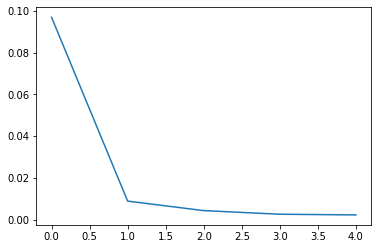

In [19]:
plt.plot(range(len(losses['mse'][0])), losses['mse'][0])

### Temp

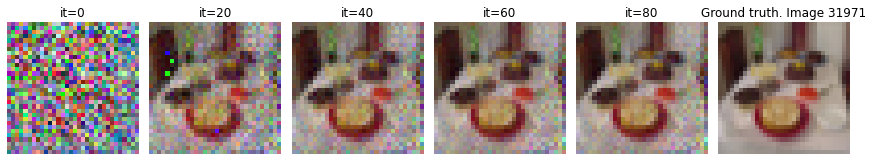

In [17]:
exp.make_reconstruction_plots()

In [18]:
losses = exp.losses
losses['mse']

[[0.09698254558284397,
  0.008839709028375475,
  0.004278271501735591,
  0.0025396978114763376,
  0.002215441425304795]]

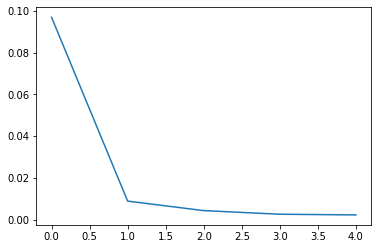

In [19]:
plt.plot(range(len(losses['mse'][0])), losses['mse'][0])

### Investigate gradients

In [40]:
dummy_data, dummy_label = exp.init_data()
dummy_pred = exp.net(dummy_data)
dummy_onehot_label = F.softmax(dummy_label, dim=-1)
dummy_loss = cross_entropy_for_onehot(dummy_pred, dummy_onehot_label)
dummy_dy_dx = torch.autograd.grad(dummy_loss, exp.net.parameters(), create_graph=True)

In [ ]:
exp.original_dy_dx[0].numpy().reshape(-1)

In [32]:
torch.var(exp.original_dy_dx[2])

tensor(0.0306)

In [50]:
np.exp(-95.74013/0.03058373)

0.0

In [31]:
np.var(exp.original_dy_dx[2].numpy().reshape(-1))

0.03058373

In [43]:
np.var(dummy_dy_dx[2].detach().numpy().reshape(-1))

0.019970989

In [55]:
np.sum((dummy_dy_dx[4].detach().numpy() - exp.original_dy_dx[4].numpy())

6.8574905

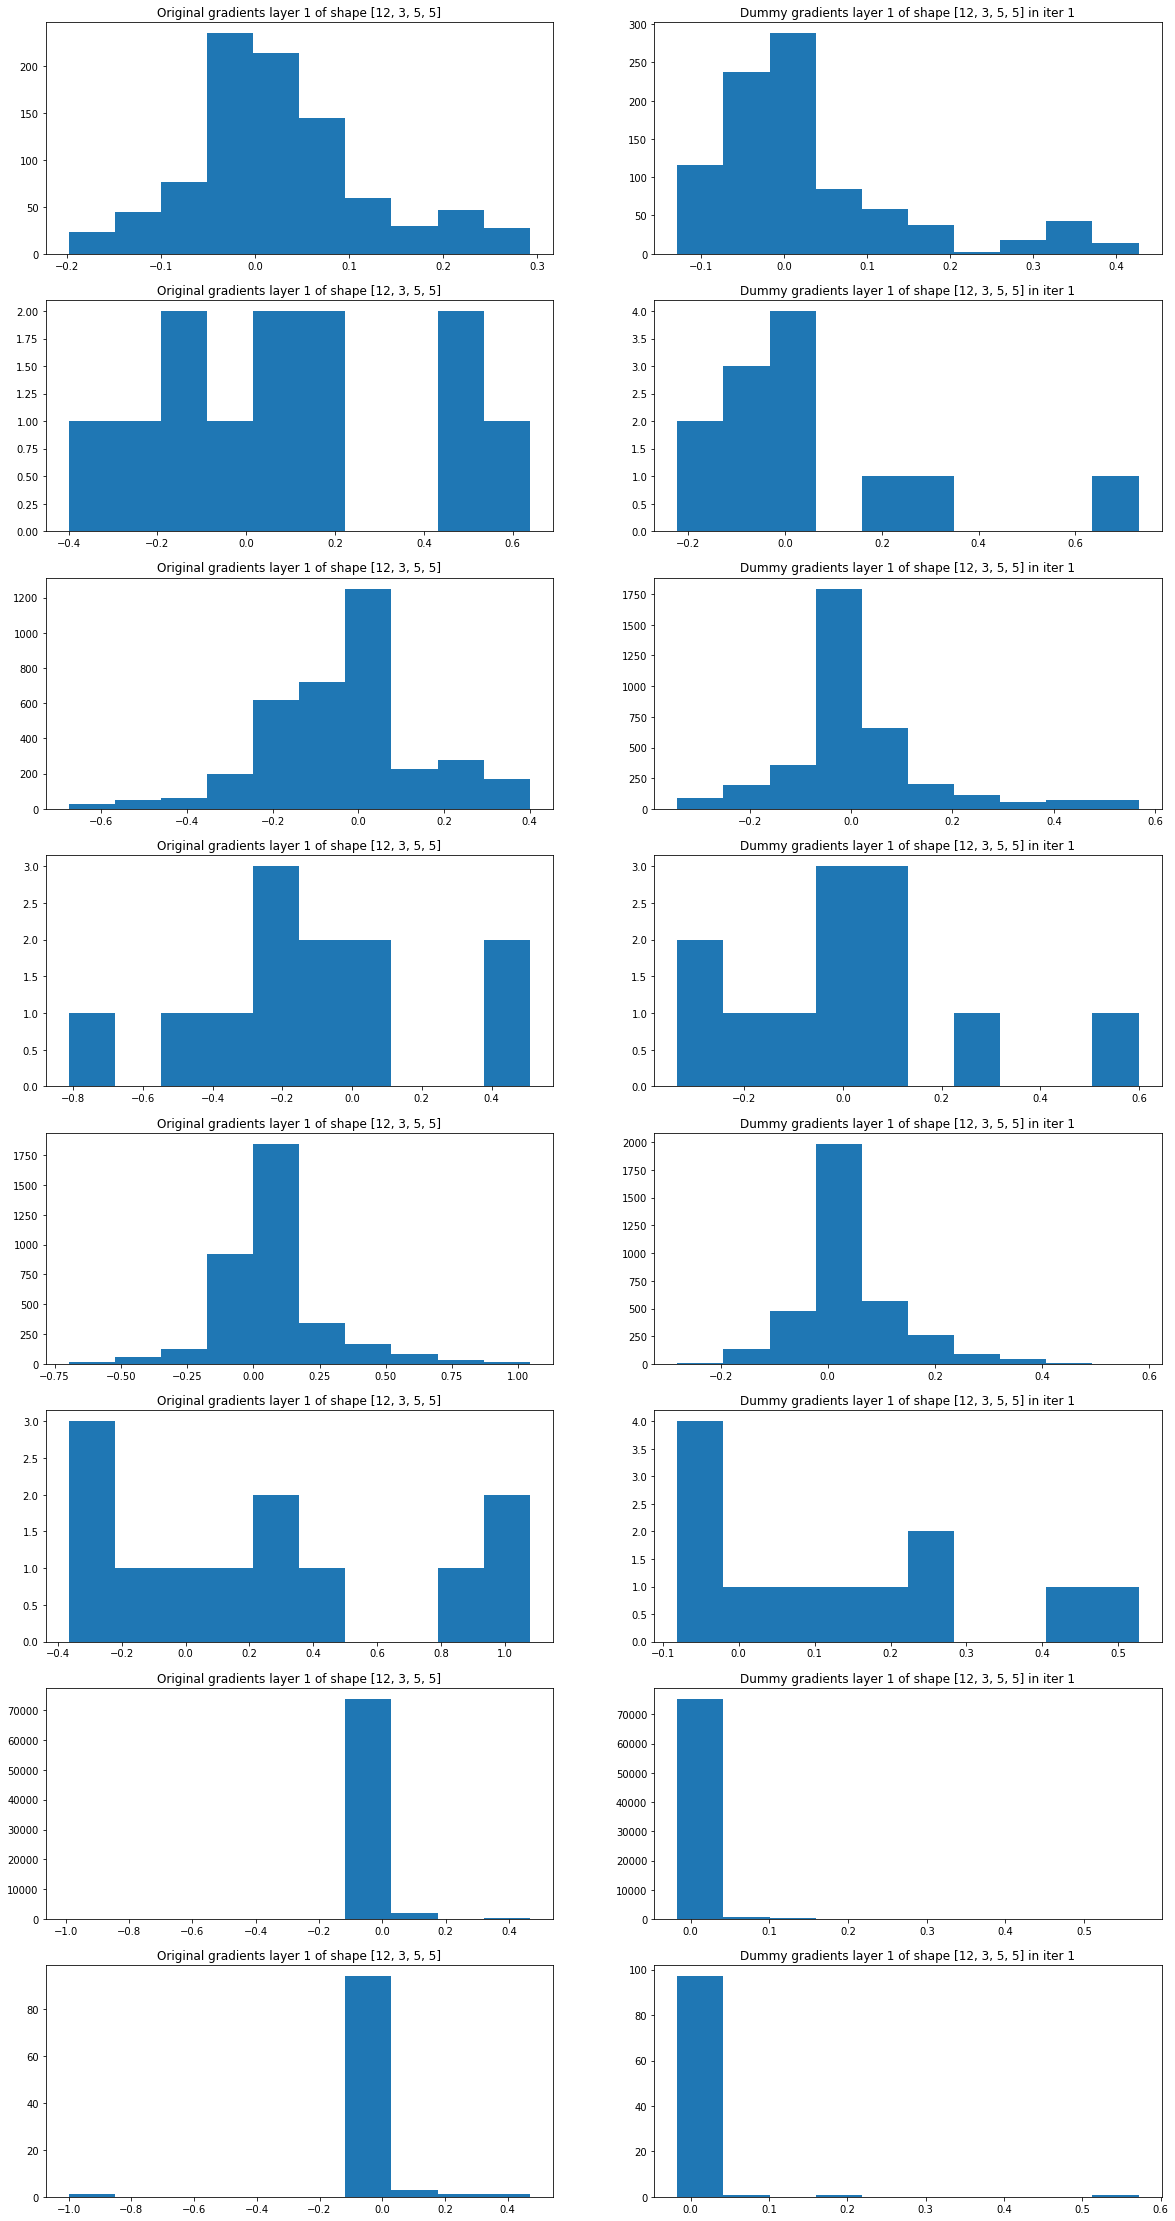

In [64]:
fig, axes = plt.subplots(8, 2, figsize=(20,40))
for i, ax in enumerate(axes):
    ax[0].set_title("Original gradients layer 1 of shape [12, 3, 5, 5]")
    ax[0].hist(exp.original_dy_dx[i].detach().numpy().reshape(-1))
    ax[1].set_title("Dummy gradients layer 1 of shape [12, 3, 5, 5] in iter 1")
    ax[1].hist(dummy_dy_dx[i].detach().numpy().reshape(-1))
plt.show()